Iteration 1: Error = 0.3774285364743277
Iteration 2: Error = 0.03633007441478652
Iteration 3: Error = 0.0481191642620008
Iteration 4: Error = 0.07658346935009734
Iteration 5: Error = 0.05567226759880738
Iteration 6: Error = 0.06784916309438667
Iteration 7: Error = 0.04373558112765149
Iteration 8: Error = 0.07780525018848981
Iteration 9: Error = 0.06236962371249478
Iteration 10: Error = 0.04496049836896621
Iteration 11: Error = 0.017621379975025542
Iteration 12: Error = 0.05330666883237349
Iteration 13: Error = 0.0701538689357585
Iteration 14: Error = 0.07143188081908393
Iteration 15: Error = 0.057877077355912306
Iteration 16: Error = 0.07721483321501353
Iteration 17: Error = 0.023395674328613364
Iteration 18: Error = 0.06807864306425995
Iteration 19: Error = 0.06832276616764406
Iteration 20: Error = 0.0683227662054558
Iteration 21: Error = 0.0686009324378827
Iteration 22: Error = 0.04671086140222886
Iteration 23: Error = 0.07164873941970373
Iteration 24: Error = 0.0556246052895651
Iter

<bound method Axes.legend of <Axes: title={'center': 'Quantum Energy Levels'}, xlabel='Index', ylabel='Energy (eV)'>>

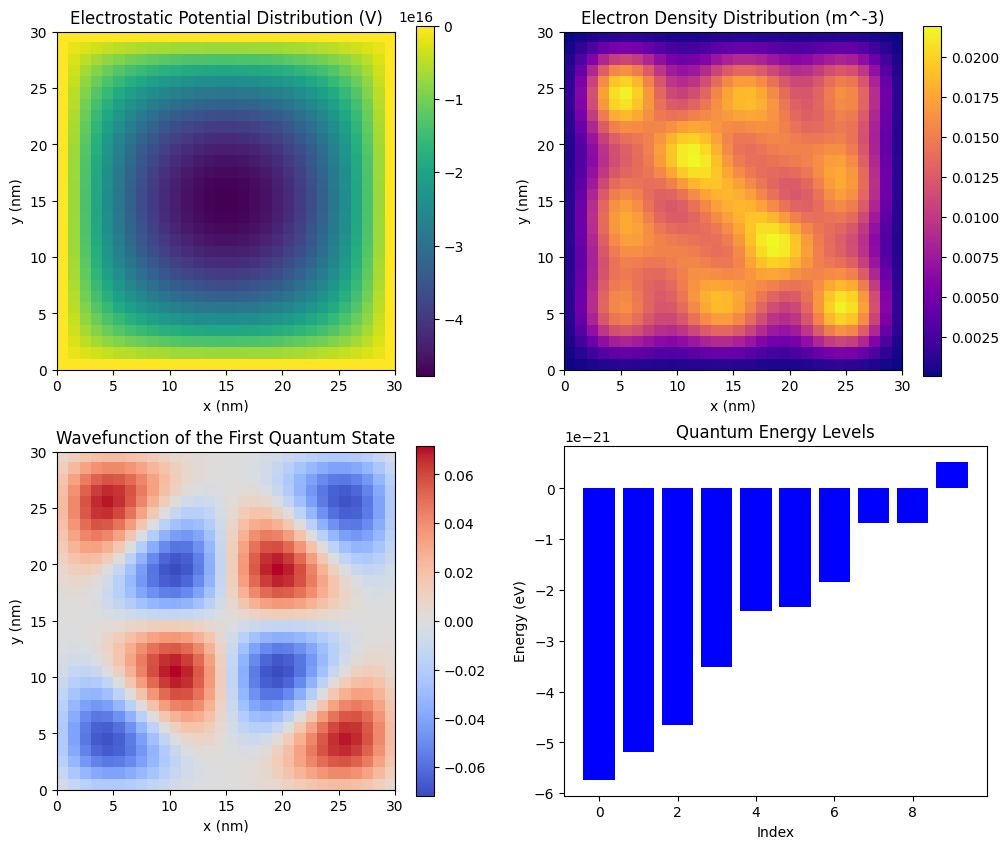

In [23]:
import matplotlib.pyplot as plt
from Solver import * 

#simulation parameter
Nx, Ny = 30, 30  # 2D  
grid_shape = (Nx, Ny)
dx = dy = 1e-9   
#input parameter
epsilon = 11.7 * const.epsilon_0   
effective_mass = 0.19   
temperature = 300   
fermi_level = 1.5  
doping_profile = np.ones(grid_shape) * 5e23 
bias_boundaries = [3,3,3,0]

#Solver
solver2D = SchrodingerPoissonSolver2D(grid_shape, epsilon, effective_mass, doping_profile, temperature, fermi_level, bias_boundaries)
phi, energy_levels, wavefunctions, n_final = solver2D.solve()

#visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (1)
ax1 = axes[0, 0]
im1 = ax1.imshow(phi, cmap="viridis", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax1.set_title("Electrostatic Potential Distribution (V)")
ax1.set_xlabel("x (nm)")
ax1.set_ylabel("y (nm)")
fig.colorbar(im1, ax=ax1)

# (2)  
ax2 = axes[0, 1]
im2 = ax2.imshow(n_final, cmap="plasma", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax2.set_title("Electron Density Distribution (m^-3)")
ax2.set_xlabel("x (nm)")
ax2.set_ylabel("y (nm)")
fig.colorbar(im2, ax=ax2)

# (3)  
ax3 = axes[1, 0]
im3 = ax3.imshow(wavefunctions[:, :, 0], cmap="coolwarm", extent=[0, Nx*dx*1e9, 0, Ny*dy*1e9])
ax3.set_title("Wavefunction of the First Quantum State")
ax3.set_xlabel("x (nm)")
ax3.set_ylabel("y (nm)")
fig.colorbar(im3, ax=ax3)

# (4)  
ax4 = axes[1, 1]
ax4.bar(range(len(energy_levels)), energy_levels, color="blue", label="Energy Levels (eV)")
ax4.set_title("Quantum Energy Levels")
ax4.set_xlabel("Index")
ax4.set_ylabel("Energy (eV)")
ax4.legend